Importing the Dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



Data Collection & Analysis

In [20]:
#load data from csv file
IPL_dataset = pd.read_csv('deliveries.csv')

In [21]:
# first 5 rows of the dataframe
IPL_dataset.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [15]:
 # number of rows and colums
IPL_dataset.shape

(260920, 17)

In [16]:
# getting some informations about the dataset
IPL_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

Categorical Features:
*   batting team
*   player_dismissed
*   dismissal_kind
*   total_runs





In [17]:
#checkfor missing values
IPL_dataset.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

Data Anlysis

In [18]:
# satistical Measures of the datse
IPL_dataset.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


C:\Users\rites\AppData\Local\Temp\ipykernel_9948\3003607325.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(IPL_dataset['batsman_runs'])


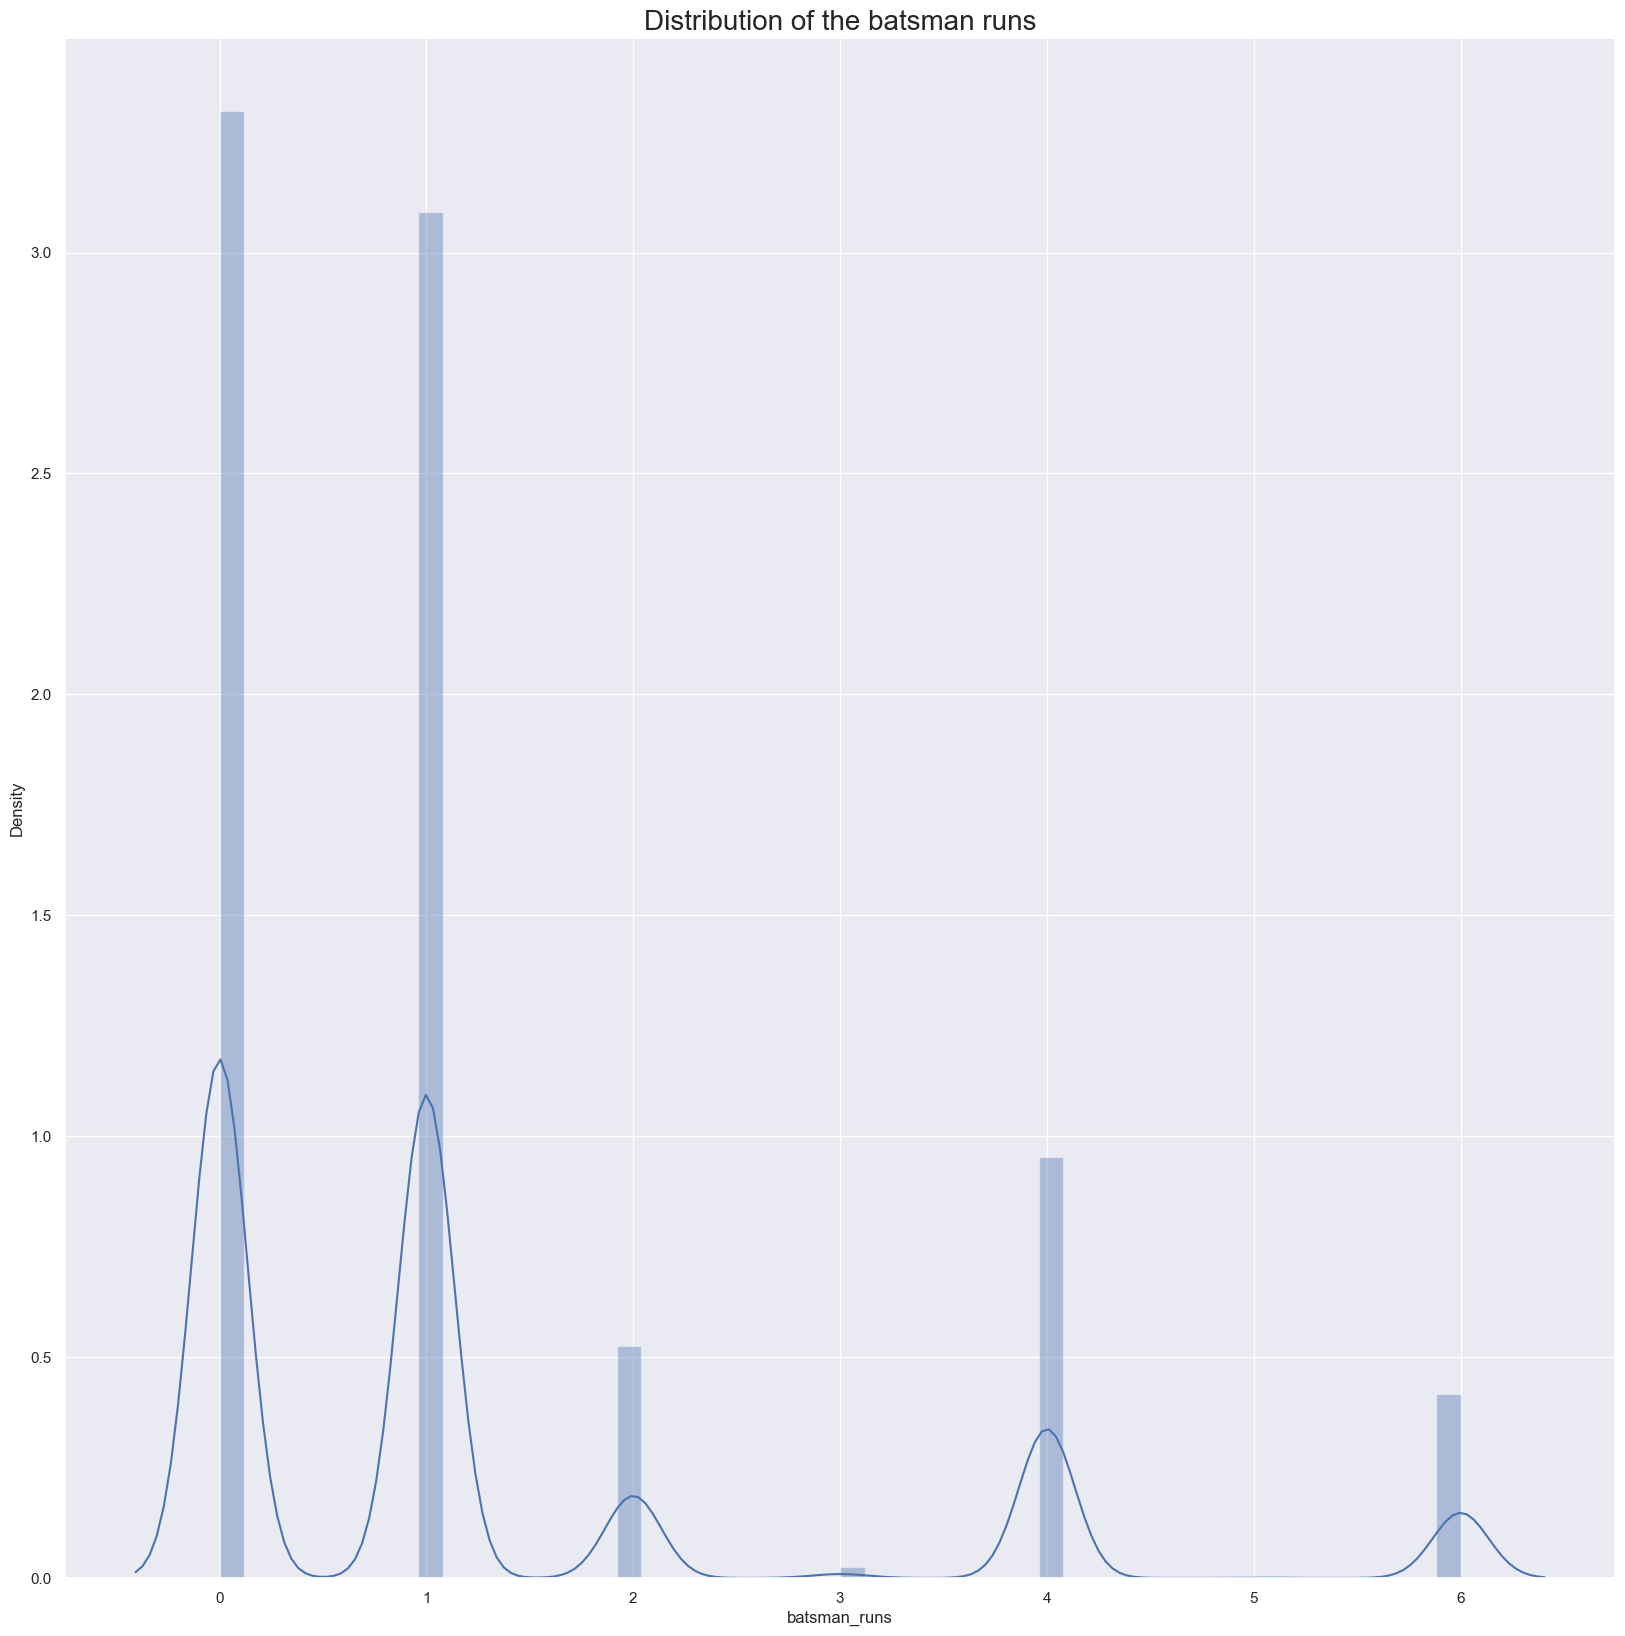

In [22]:
# import the seaborn library
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt

# Distribution of the batsman runs
sns.set()
plt.figure(figsize=(20,20))
sns.distplot(IPL_dataset['batsman_runs'])
plt.title('Distribution of the batsman runs', fontsize = 20)
plt.show()

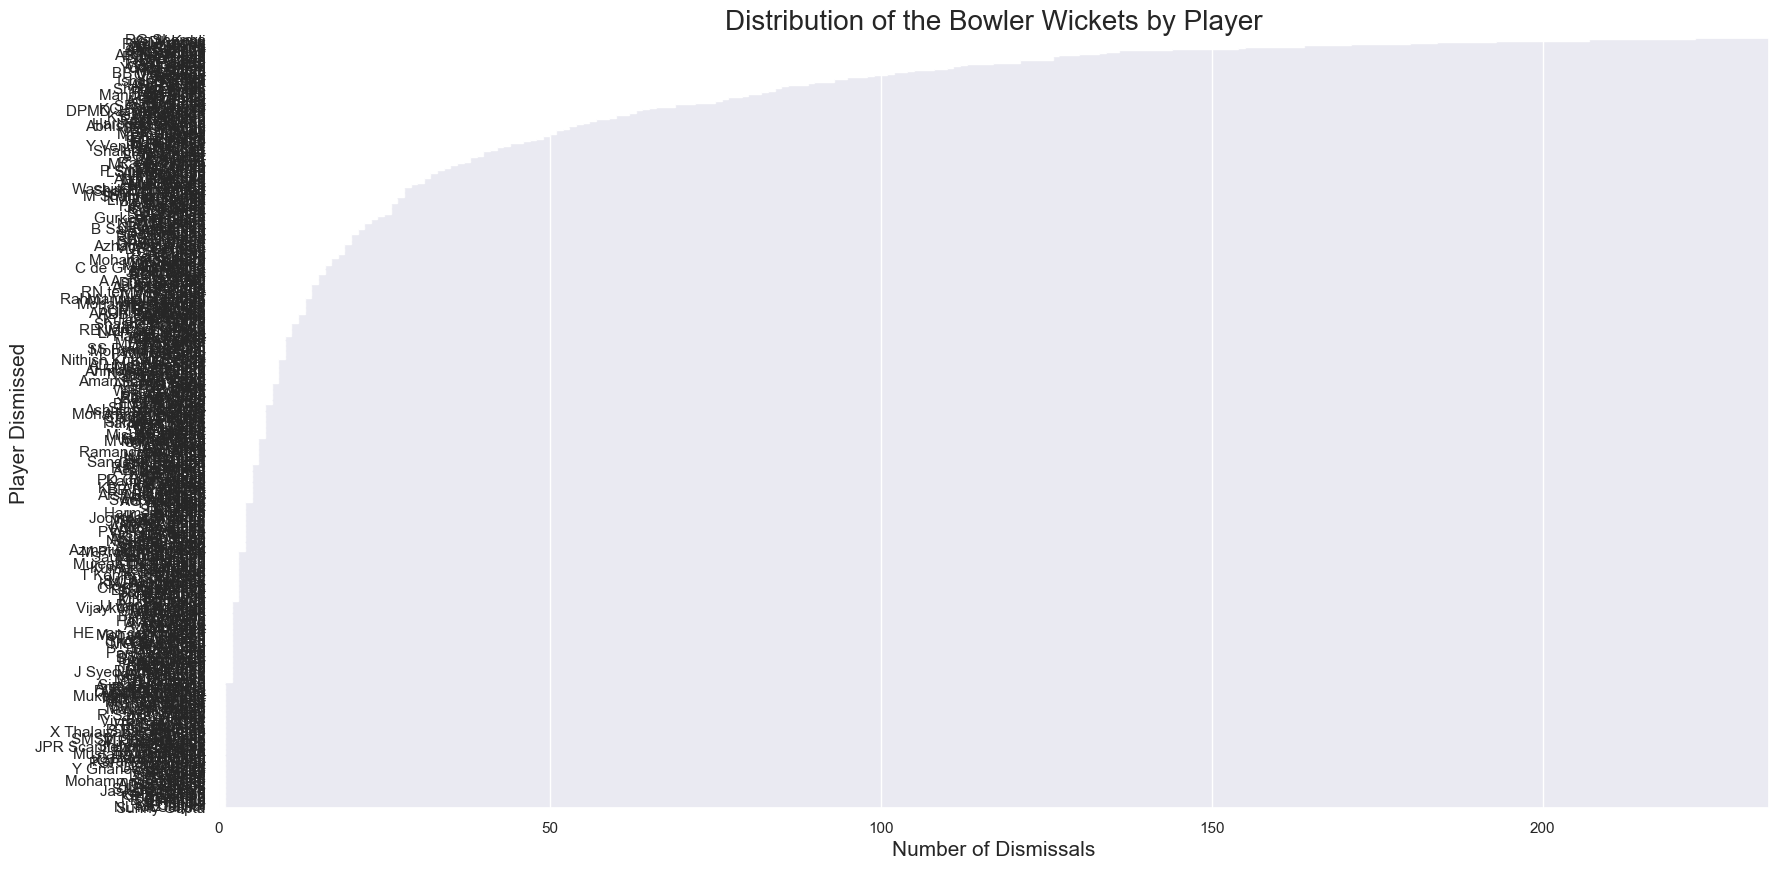

In [27]:
sns.set()
plt.figure(figsize=(20, 10))

# Use a count plot for categorical data
sns.countplot(y=IPL_dataset['player_dismissed'], order=IPL_dataset['player_dismissed'].value_counts().index)


plt.title('Distribution of the Bowler Wickets by Player', fontsize=20)
plt.xlabel('Number of Dismissals', fontsize=15)
plt.ylabel('Player Dismissed', fontsize=15)

# Show the plot
plt.show()


C:\Users\rites\AppData\Local\Temp\ipykernel_9948\4150892926.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette='viridis')


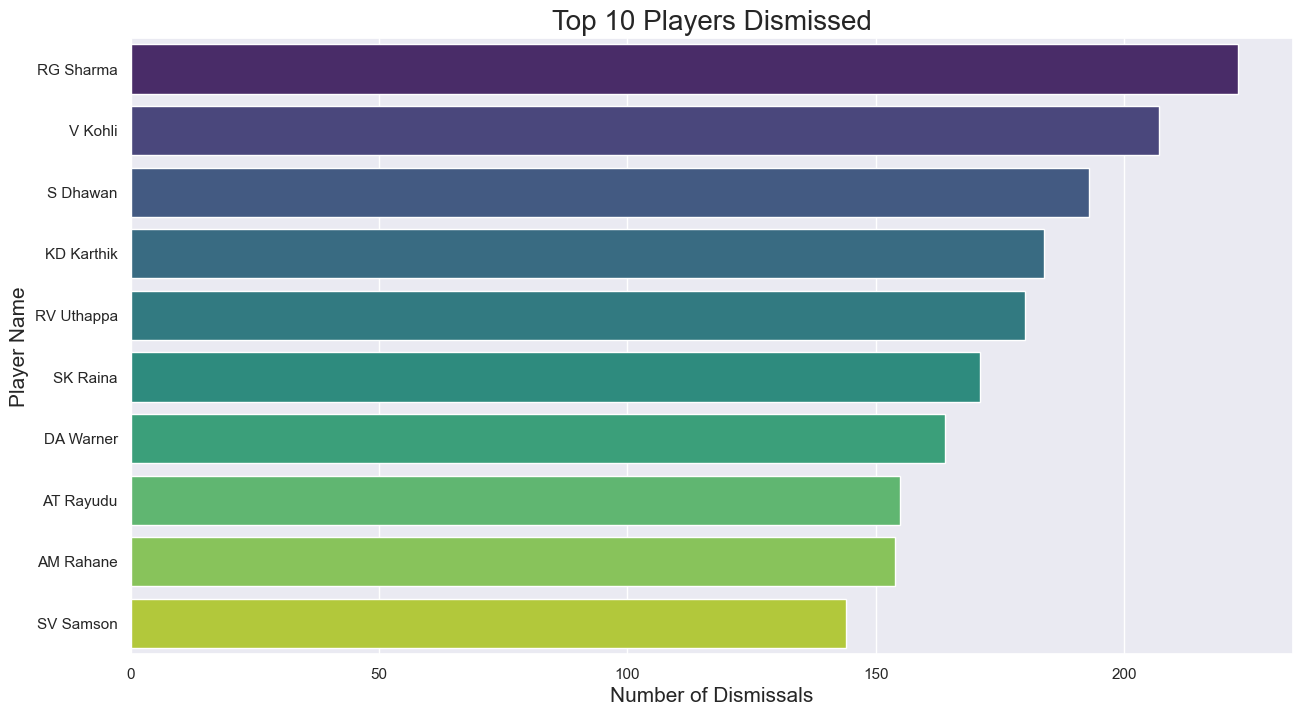

In [25]:
import pandas as pd

# Aggregate the data to count dismissals
dismissal_counts = IPL_dataset['player_dismissed'].value_counts().head(10)  # Top 10 players

# Plot a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette='viridis')

# Add title and labels
plt.title('Top 10 Players Dismissed', fontsize=20)
plt.xlabel('Number of Dismissals', fontsize=15)
plt.ylabel('Player Name', fontsize=15)

# Show the plot
plt.show()


In [30]:
# Aggregate the data to count dismissals
dismissal_counts = IPL_dataset['dismissal_kind'].value_counts()
print(dismissal_counts)

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


C:\Users\rites\AppData\Local\Temp\ipykernel_9948\1150060939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette='viridis')


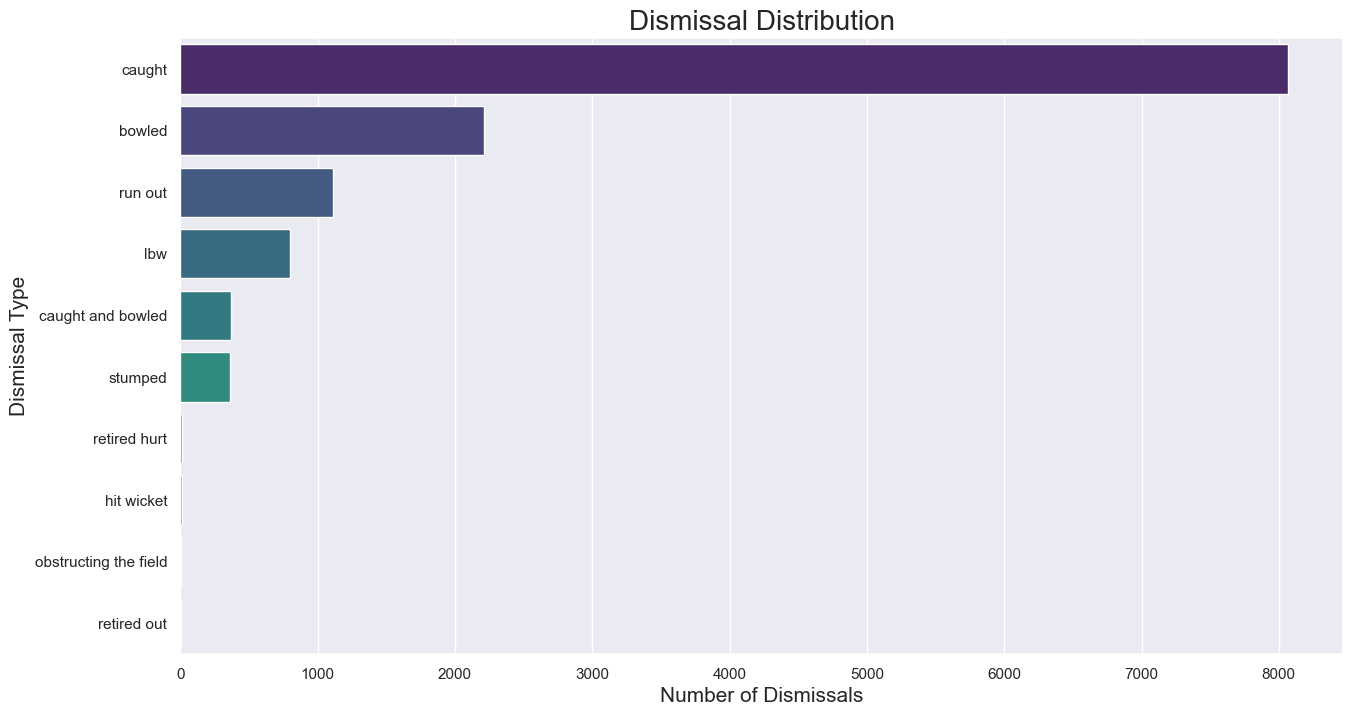

In [31]:
# Plot a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=dismissal_counts.values, y=dismissal_counts.index, palette='viridis')

# Add title and labels
plt.title('Dismissal Distribution', fontsize=20)
plt.xlabel('Number of Dismissals', fontsize=15)
plt.ylabel('Dismissal Type', fontsize=15)

# Show the plot
plt.show()

In [32]:
# Aggregate the data to count sixes
sixes = IPL_dataset['batsman_runs'] == 6
sixes = sixes.value_counts()
print(sixes)


batsman_runs
False    247869
True      13051
Name: count, dtype: int64


In [34]:
# total_runs column
total_runs = IPL_dataset['total_runs'].value_counts()
print(total_runs)

total_runs
1    108440
0     90438
4     30221
2     17323
6     12964
3       922
5       524
7        88
Name: count, dtype: int64


C:\Users\rites\AppData\Local\Temp\ipykernel_9948\3199898354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_runs.index, y=total_runs.values, palette='viridis')


<Axes: xlabel='total_runs'>

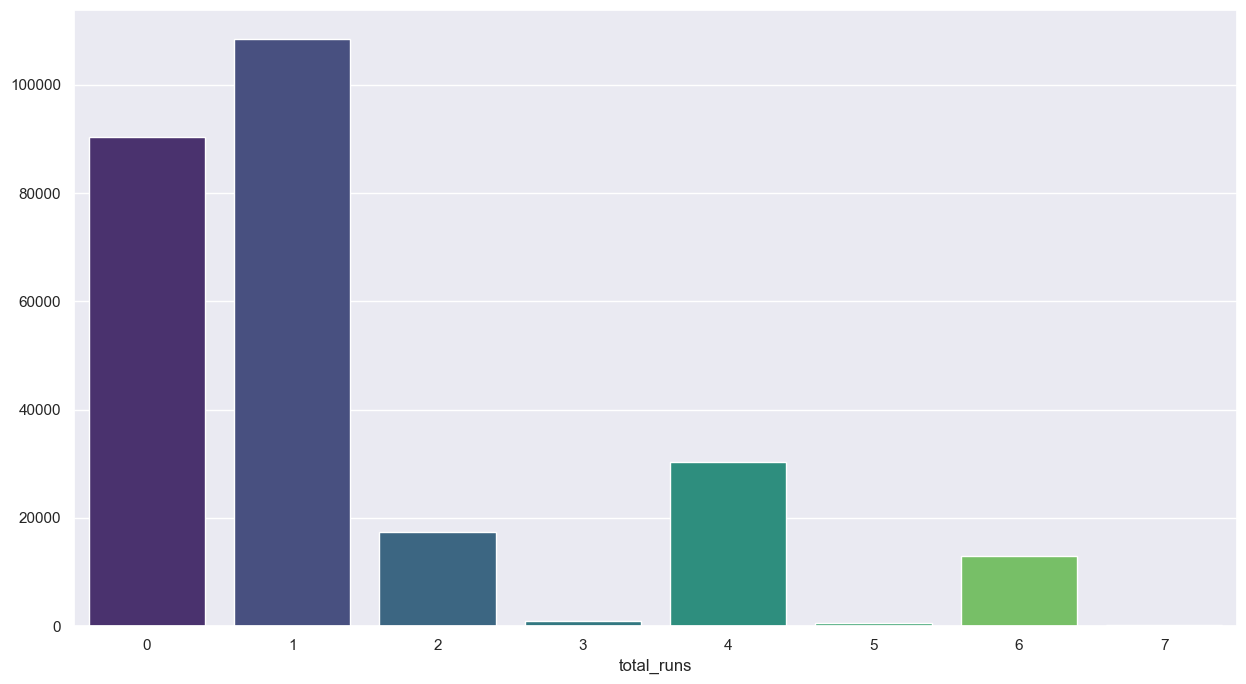

In [36]:
# plot total_runs column

plt.figure(figsize=(15, 8))
sns.barplot(x=total_runs.index, y=total_runs.values, palette='viridis')

In [38]:
#extra_runs column
extra_runs = IPL_dataset['extra_runs'].value_counts()
print(extra_runs)

extra_runs
0    246795
1     12628
2       585
4       504
5       325
3        82
7         1
Name: count, dtype: int64


C:\Users\rites\AppData\Local\Temp\ipykernel_9948\419591019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extra_runs.index, y=extra_runs.values, palette='viridis')


<Axes: xlabel='extra_runs'>

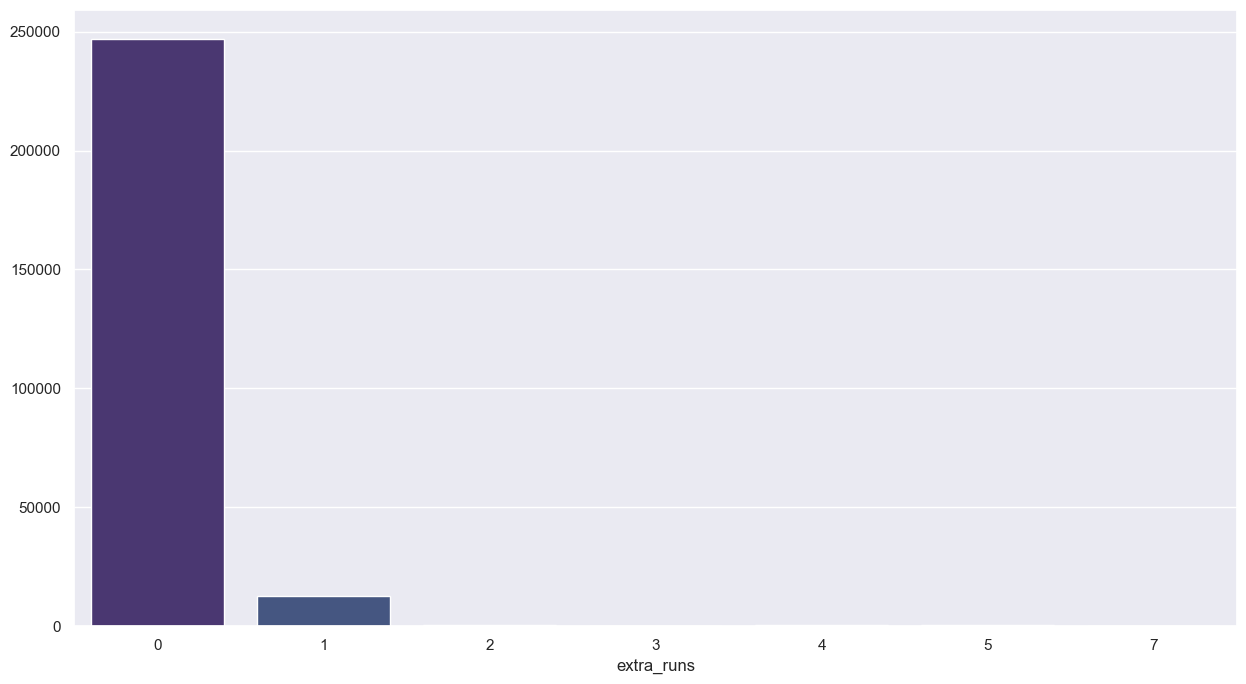

In [39]:
# plot extra_runs column
plt.figure(figsize=(15, 8))
sns.barplot(x=extra_runs.index, y=extra_runs.values, palette='viridis')

Data Pre-Processing

Encoding the Categorical features

In [40]:
  # encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# encoding the 'dismissal_kind' column
IPL_dataset['dismissal_kind'] = label_encoder.fit_transform(IPL_dataset['dismissal_kind'])

# encoding the 'player_dismissed' column
IPL_dataset['player_dismissed'] = label_encoder.fit_transform(IPL_dataset['player_dismissed'])

# encoding the 'batting_team' column
IPL_dataset['batting_team'] = label_encoder.fit_transform(IPL_dataset['batting_team'])

# encoding the 'total_runs' column 
IPL_dataset['total_runs'] = label_encoder.fit_transform(IPL_dataset['total_runs'])

Splitting the Features and Target

In [44]:
X = IPL_dataset['total_runs'].values.reshape(-1,1)
Y = IPL_dataset['batsman_runs'].values.reshape(-1,1)


In [45]:
print (X)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [56]:
print(Y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


Splitting the data into Training & Test Data

In [58]:
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Linear Regression model
lin_reg = LinearRegression()

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(260920, 1) (208736, 1) (52184, 1)


Model Training

Linear Regression

In [60]:
# Import the necessary class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# loading the Linear Regression model
regressor = LinearRegression()

In [61]:
regressor.fit(X_train, Y_train)


LinearRegression()

Model Evaluation

In [62]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [63]:
# Import the necessary class from sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Import the metrics module
from sklearn.metrics import r2_score

# loading the Linear Regression model
regressor = LinearRegression()

# ... (rest of your code)

# R squared value
r2_train = r2_score(Y_train, training_data_prediction) # Use r2_score directly
print('R squared vale : ', r2_train)

R squared vale :  0.9554280412471835


In [66]:
# Ensure the model is fitted before making predictions
regressor.fit(X_train, Y_train)

# prediction on test data using the already fitted model
test_data_prediction = regressor.predict(X_test)


In [67]:
# R squared value
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.9600210918984442


Building a Predictive System

In [69]:
# Import the necessary class from sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Import the metrics module
from sklearn.metrics import r2_score
import numpy as np # Import numpy for array operations

# loading the Linear Regression model
regressor = LinearRegression()

# Assuming you have X_train, Y_train data loaded...

# Fit the model to your training data
regressor.fit(X_train, Y_train)  # This line is crucial!

# ... (rest of your code)

# R squared value
r2_train = r2_score(Y_train, training_data_prediction) # Use r2_score directly
print('R squared vale : ', r2_train)

# ... (rest of your code)

# prediction on test data
test_data_prediction = regressor.predict(X_test)

# ... (rest of your code)

# R squared value
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

# ... (rest of your code)

# Example input data with a single feature (total_runs)
input_data = (31,)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The predicted batsman runs are: ', prediction[0])

R squared vale :  0.9554280412471835
R squared vale :  0.9600210918984442
[[30.4876461]]
The predicted batsman runs are:  [30.4876461]
